# CONNECTTEL CUSTOMER CHURN PREDICTION
## Problem Overview

ConnectTel, a prominent telecommunications company, is currently grappling with a critical issue of customer churn, posing a substantial threat to its business sustainability and expansion. The company's existing customer retention strategies are deemed imprecise and ineffective, resulting in the loss of valuable customers to competitors. To address this challenge, ConnectTel is seeking to develop a robust customer churn prediction system leveraging advanced analytics and machine learning techniques on available customer data to accurately forecast customer churn. The ultimate goal is to implement targeted retention initiatives, allowing ConnectTel to proactively reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

In [14]:
# import necessary libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

 # Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split

# Classifier Libraries (Machine Learning Algorithms)
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load dataset
df = pd.read_csv(r'Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# High-level overview of a DataFrame:
## data types, number of rows & columns,
## number of non-null values for each column and Missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.shape

(7043, 21)

In [18]:
df.size

147903

In [19]:
# Descriptive statistics:
## Measures of central tendency: mean, median, and mode
## Measures of dispersion: standard deviation, variance, minimum, maximum, and quartiles

df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [20]:
#Categorical Data Analysis
# Descriptive statistics for the categorical columns (object columns) in a DataFrame
df.describe(include = [object]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [21]:
#Check for unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [22]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
# Print the value counts of the 'Churn' column (The target variable)
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## There are two distinct values in the 'Churn' column: 'No' and 'Yes'. The value 'No' appears 5,174 times, while the value 'Yes' appears 1,869 times.
- This suggests that there is a significant imbalance between the two categories, with 'No' being the more prevalent category

In [26]:
# counts the number of duplicate rows
# Note: No duplicate
df.duplicated().sum()

0

In [27]:
# counts the number of missing values for each column
df.isnull().sum()
#data.isna().sum()

# Note: No missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
# Dropping the redundant data features (column)

df.drop('customerID', axis=1, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## However, the redundant variable which is customerID has been dropped

# key Observations
- No missing data points/values
- No duplicates
- There is a significant imbalance of the target variable, Churn.
- customerID was found to be redundant and it was dropped

# Univariate Data Analysis

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
# Show the categorical Features
cat_feat = df.select_dtypes('object').columns.to_list()
cat_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [31]:
# Show the numerical features
num_feat = df.select_dtypes(np.number).columns.to_list()
num_feat

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [32]:
df['SeniorCitizen'].unique()

array([0, 1])

In [33]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [34]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [35]:
df['SeniorCitizen'].unique()

array([0, 1])

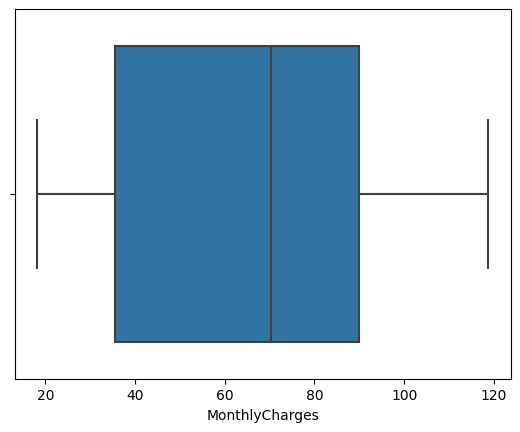

In [36]:
# Check for outliers
sns.boxplot(x=df['MonthlyCharges']);

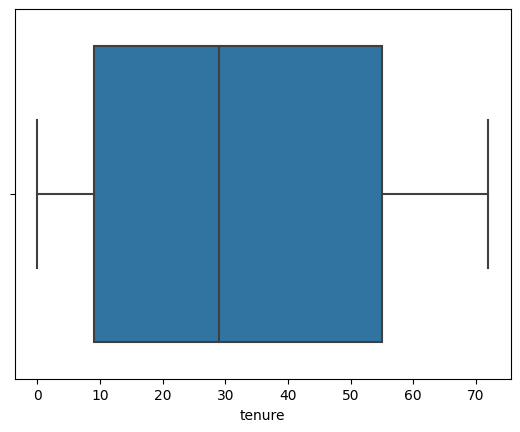

In [37]:
sns.boxplot(x=df['tenure']);

Junior_Citizen    5901
Senior_Citizen    1142
Name: citizens_cat, dtype: int64

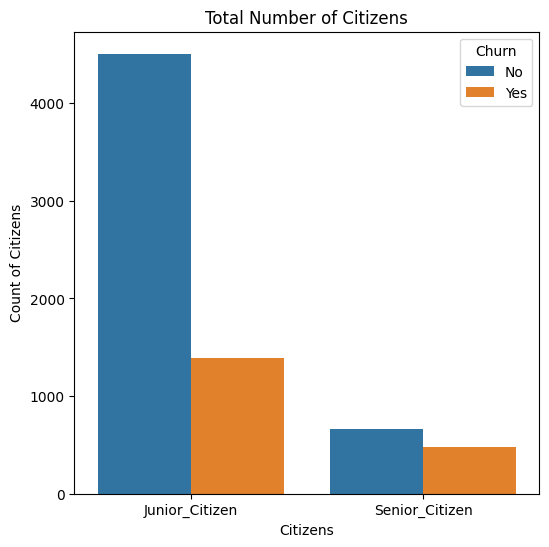

In [38]:
# Data visualizaito for SeniorCitizen

def SeniorCitizen(citizens):
    if citizens == 1:
        return 'Senior_Citizen'
    else:
        return 'Junior_Citizen'

# To create the new column of SeniorCitizen
df['citizens_cat']=df['SeniorCitizen'].apply(SeniorCitizen)

plt.figure(figsize = (6,6))
sns.countplot(x='citizens_cat', data=df, hue ='Churn')
plt.xlabel('Citizens')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens')

df['citizens_cat'].value_counts()

Count of Citizens Categories:
Junior Citizen    5901
Senior Citizen    1142
Name: citizens_cat, dtype: int64


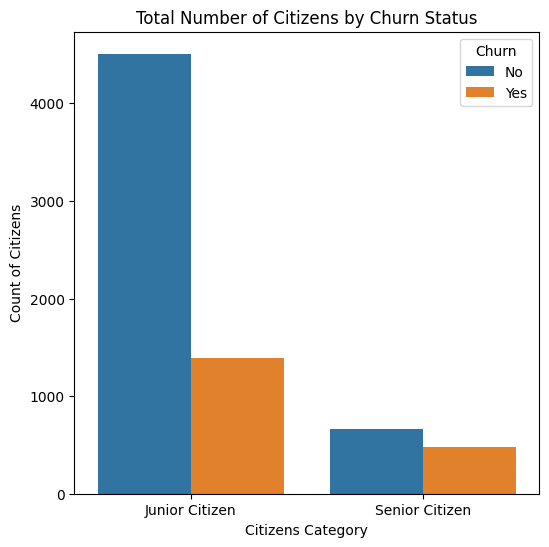

In [39]:
# Data visualization for SeniorCitizen

# Function to categorize citizens
def SeniorCitizenLabel(citizens):
    if citizens == 1:
        return 'Senior Citizen'
    else:
        return 'Junior Citizen'

# To create the new column of SeniorCitizen
df['citizens_cat'] = df['SeniorCitizen'].apply(SeniorCitizenLabel)

# Plotting
plt.figure(figsize=(6, 6))
sns.countplot(x='citizens_cat', data=df, hue='Churn')
plt.xlabel('Citizens Category')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens by Churn Status')

# Display the count of each citizens category
citizens_count = df['citizens_cat'].value_counts()
print("Count of Citizens Categories:")
print(citizens_count)

Count of Citizens Categories:
Junior Citizen    5901
Senior Citizen    1142
Name: citizens_cat, dtype: int64


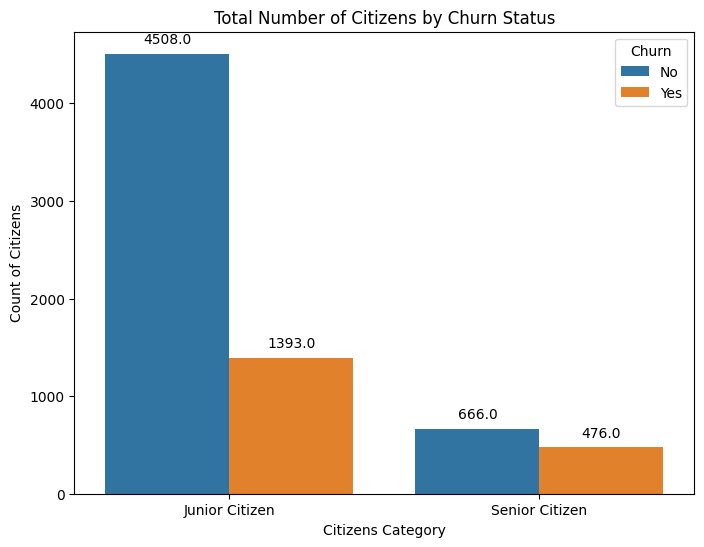

In [40]:
# Data visualization for SeniorCitizen

# Function to categorize citizens
def SeniorCitizenLabel(citizens):
    if citizens == 1:
        return 'Senior Citizen'
    else:
        return 'Junior Citizen'

# To create the new column of SeniorCitizen
df['citizens_cat'] = df['SeniorCitizen'].apply(SeniorCitizenLabel)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='citizens_cat', data=df, hue='Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Citizens Category')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens by Churn Status')

# Display the count of each citizens category
citizens_count = df['citizens_cat'].value_counts()
print("Count of Citizens Categories:")
print(citizens_count)



Count of Citizens Categories:
Junior Citizen    5901
Senior Citizen    1142
Name: citizens_cat, dtype: int64


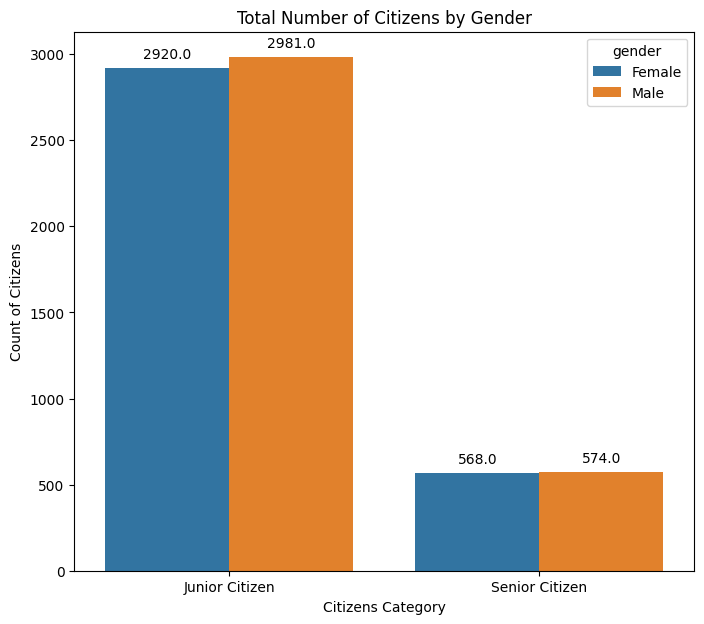

In [41]:
# Data visualization for SeniorCitizen by gender

# Plotting
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='citizens_cat', data=df, hue='gender')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Citizens Category')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens by Gender')

# Display the count of each citizens category
citizens_count = df['citizens_cat'].value_counts()
print("Count of Citizens Categories:")
print(citizens_count)

Count of gender Categories:
Male      3555
Female    3488
Name: gender, dtype: int64


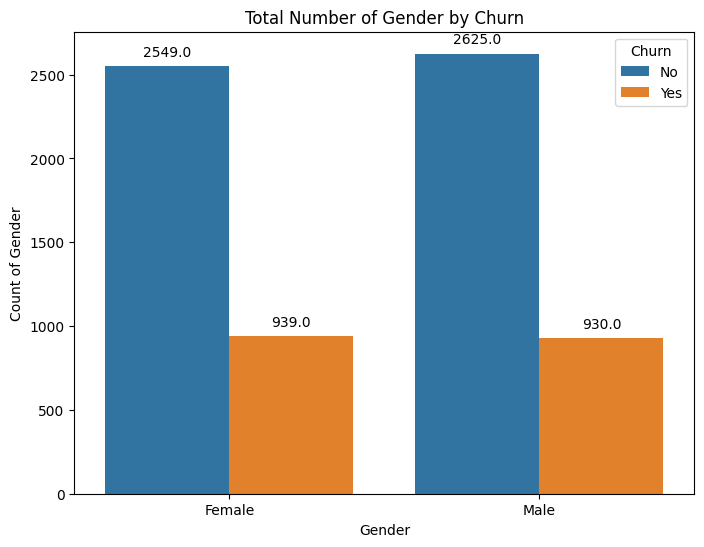

In [42]:
# Data visualizaito for gender

# Plotting
plt.figure(figsize = (8,6))
ax = sns.countplot(x='gender', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Gender by Churn')

# Display the count of each gender
gender_count = df['gender'].value_counts()
print("Count of gender Categories:")
print(gender_count)

Count of Partner Categories:
No     3641
Yes    3402
Name: Partner, dtype: int64


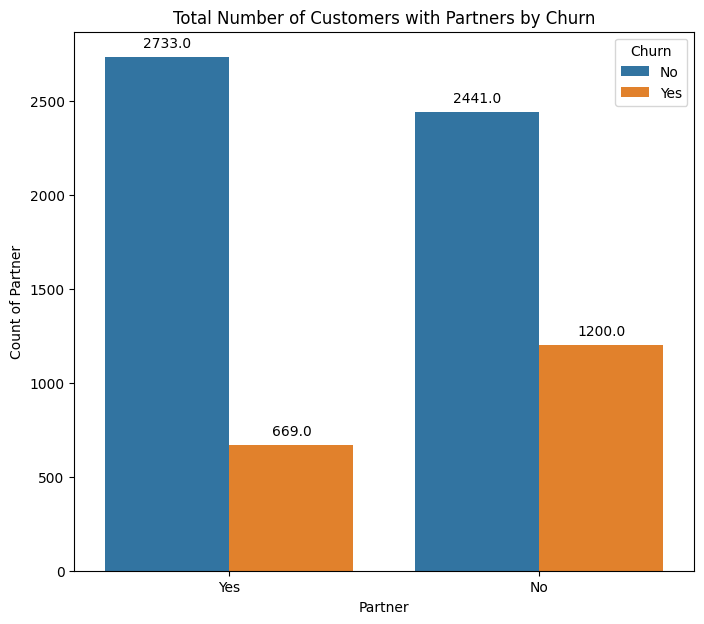

In [43]:
# Data visualizaito for Partner

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x='Partner', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Partner')
plt.ylabel('Count of Partner')
plt.title('Total Number of Customers with Partners by Churn')

# Display the count of each partner
p_count = df['Partner'].value_counts()
print("Count of Partner Categories:")
print(p_count)

Count of Dependents Categories:
No     4933
Yes    2110
Name: Dependents, dtype: int64


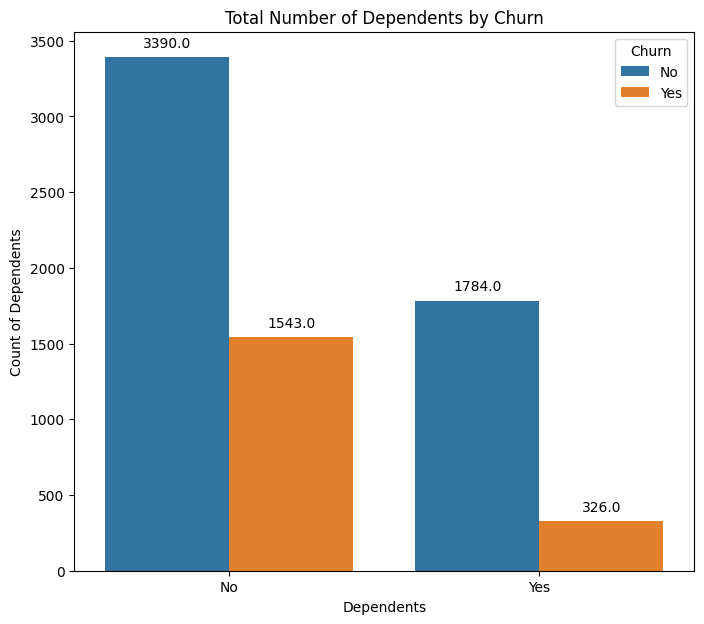

In [44]:
# Data visualizaito for PhoneService

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x= 'Dependents', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Dependents')
plt.ylabel('Count of Dependents')
plt.title('Total Number of Dependents by Churn')

# Display the count of each partner
d_count = df['Dependents'].value_counts()
print("Count of Dependents Categories:")
print(d_count)

Count of PhoneService Categories:
Yes    6361
No      682
Name: PhoneService, dtype: int64


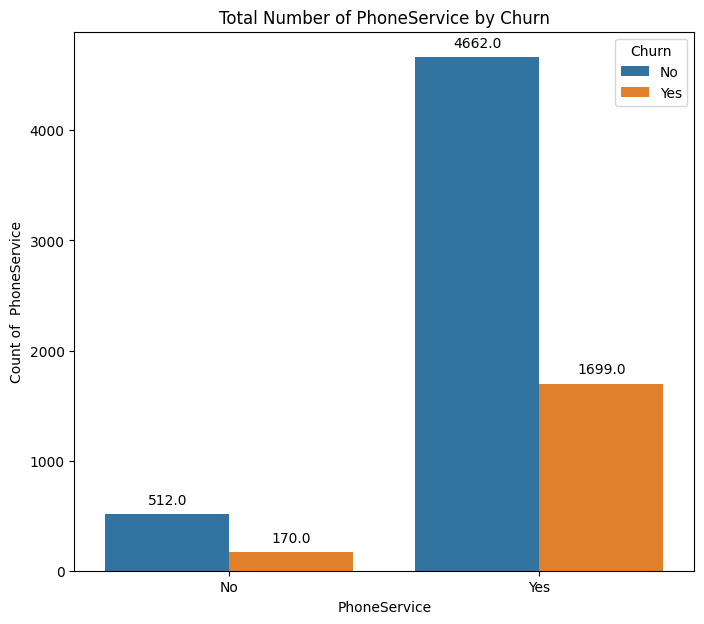

In [45]:
# Data visualizaito for PhoneService

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x= 'PhoneService', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('PhoneService')
plt.ylabel('Count of  PhoneService')
plt.title('Total Number of PhoneService by Churn')

# Display the count of each partner
ph_count = df['PhoneService'].value_counts()
print("Count of PhoneService Categories:")
print(ph_count)

Count of MultipleLines Categories:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


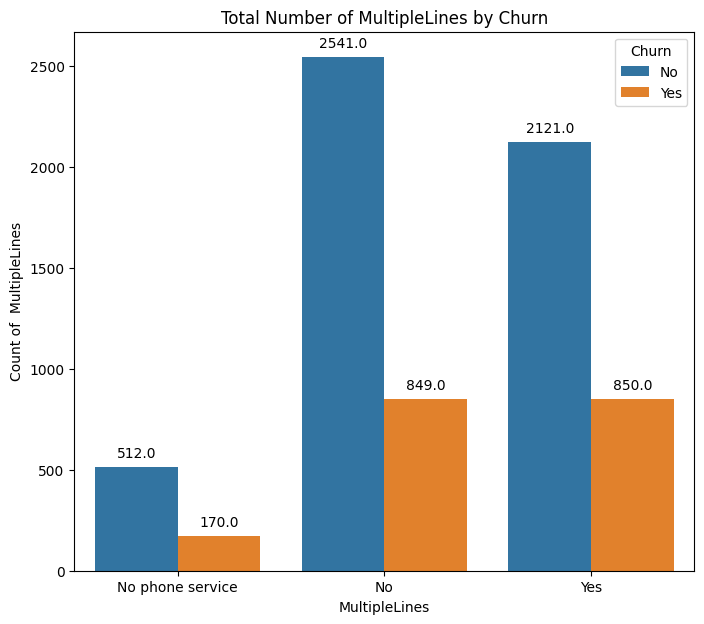

In [46]:
# To be corrected

# Data visualizaito for MultipleLines

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'MultipleLines', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('MultipleLines')
plt.ylabel('Count of  MultipleLines')
plt.title('Total Number of MultipleLines by Churn')

# Display the count of each partner
mtl_count = df['MultipleLines'].value_counts()
print("Count of MultipleLines Categories:")
print(mtl_count)

In [47]:
# No category is duplicated with wrong numenclature. It is having 3 categories instead of 2
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

# Observation: No category is duplicated with wrong numenclature.
-The duplicates shall be removed

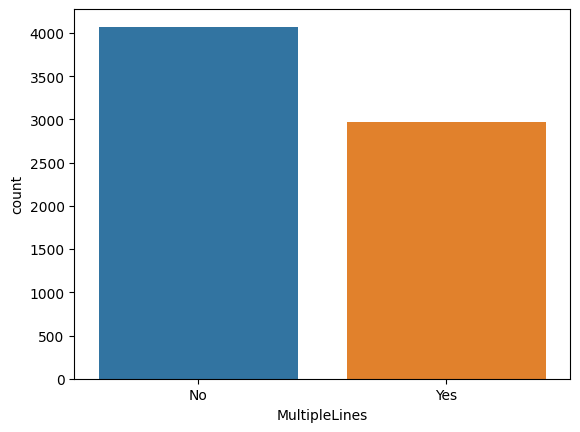

In [48]:
# Change 'No phone service' to No

df.loc[df['MultipleLines']== 'No phone service', 'MultipleLines']= 'No'
sns.countplot(x='MultipleLines', data=df);

Count of MultipleLines Categories:
No     4072
Yes    2971
Name: MultipleLines, dtype: int64


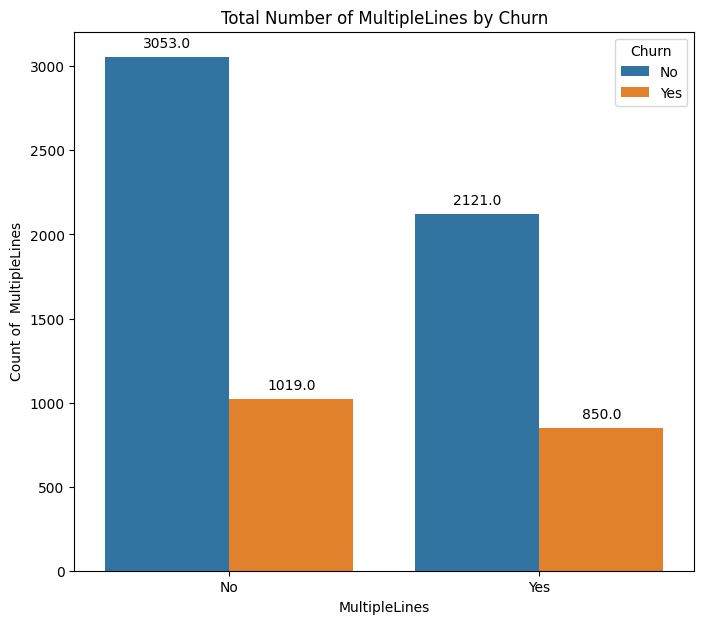

In [49]:
# Data visualizaito for MultipleLines

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'MultipleLines', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('MultipleLines')
plt.ylabel('Count of  MultipleLines')
plt.title('Total Number of MultipleLines by Churn')

# Display the count of each partner
mtl_count = df['MultipleLines'].value_counts()
print("Count of MultipleLines Categories:")
print(mtl_count)

Count of InternetService Categories:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


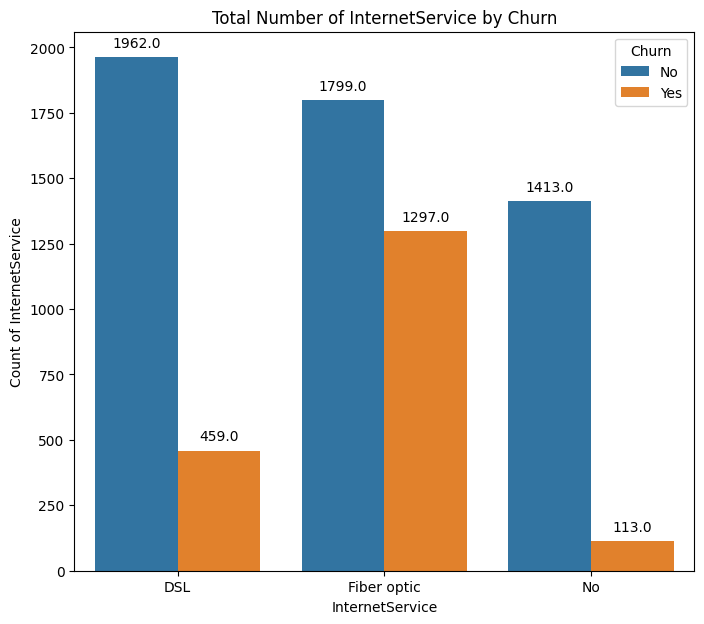

In [50]:
# Data visualizaito for InternetService

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'InternetService', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('InternetService')
plt.ylabel('Count of InternetService')
plt.title('Total Number of InternetService by Churn')

# Display the count of each partner
ints_count = df['InternetService'].value_counts()
print("Count of InternetService Categories:")
print(ints_count)

Count of OnlineSecurity Categories:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


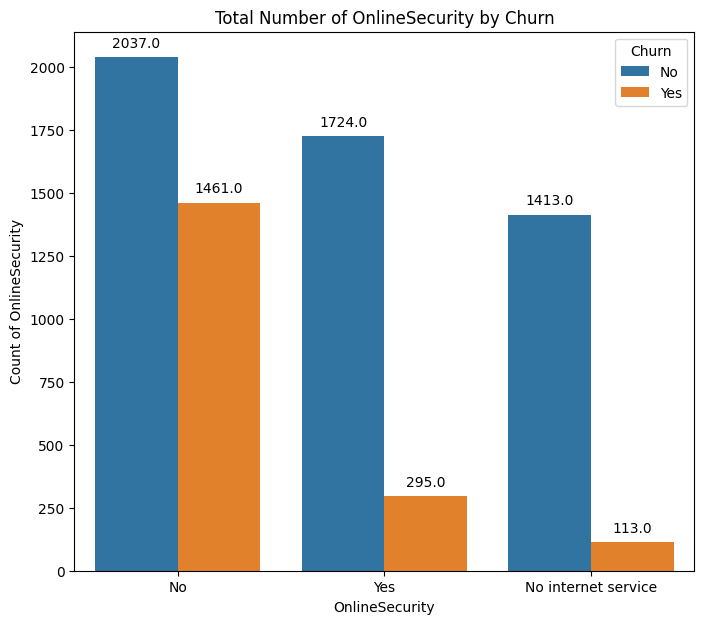

In [51]:
# This is wrong, to be corrected
# Data visualizaito for OnlineSecurity

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineSecurity', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineSecurity')
plt.ylabel('Count of OnlineSecurity')
plt.title('Total Number of OnlineSecurity by Churn')

# Display the count of each partner
onSec_count = df['OnlineSecurity'].value_counts()
print("Count of OnlineSecurity Categories:")
print(onSec_count)

In [52]:
# No category is duplicated with wrong numenclature. It is having 3 categories instead of 2
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# Observation: No category is duplicated with wrong numenclature.
-The duplicates shall be removed

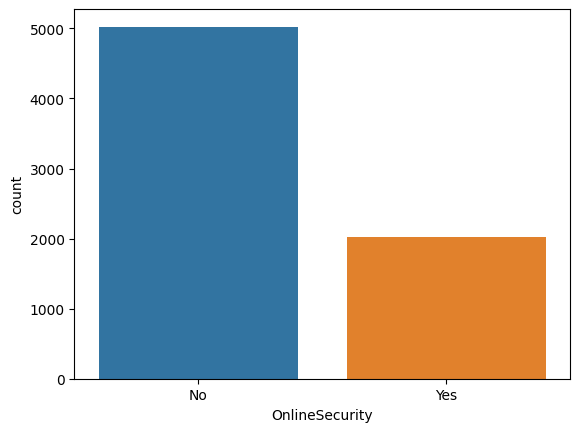

In [53]:
# Change 'No phone service' to No

df.loc[df['OnlineSecurity']== 'No internet service', 'OnlineSecurity']= 'No'
sns.countplot(x= 'OnlineSecurity', data=df);

Count of OnlineSecurity Categories:
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


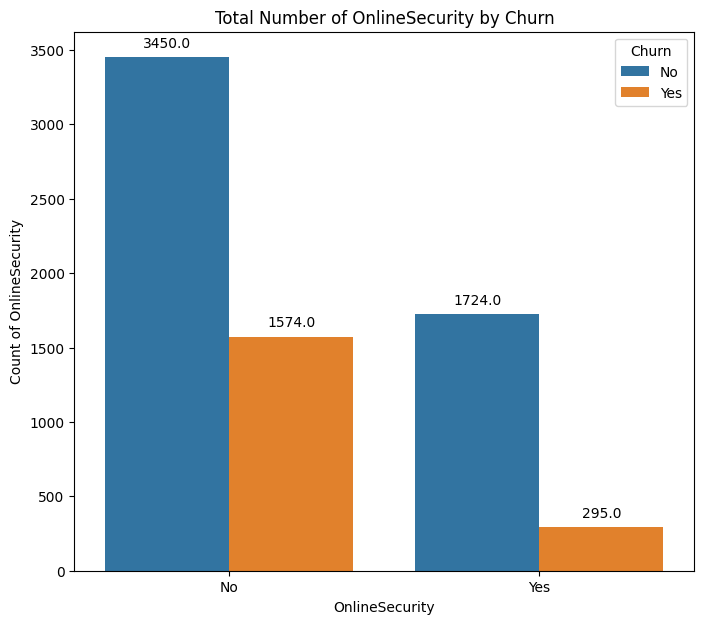

In [54]:
# Data visualizaito for OnlineSecurity

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineSecurity', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineSecurity')
plt.ylabel('Count of OnlineSecurity')
plt.title('Total Number of OnlineSecurity by Churn')

# Display the count of each partner
onSec_count = df['OnlineSecurity'].value_counts()
print("Count of OnlineSecurity Categories:")
print(onSec_count)

Count of OnlineSecurity Categories:
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


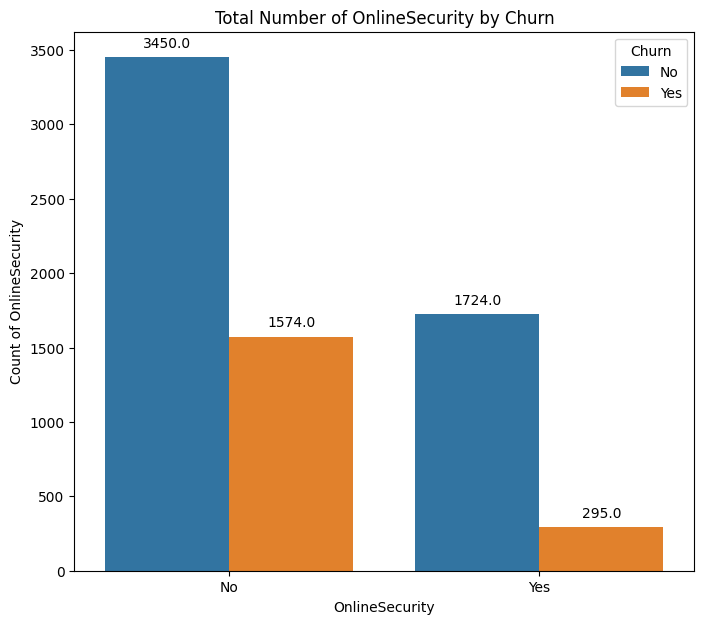

In [55]:
# Data visualizaito for OnlineSecurity by gender

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineSecurity', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineSecurity')
plt.ylabel('Count of OnlineSecurity')
plt.title('Total Number of OnlineSecurity by Churn')

# Display the count of each partner
onSec_count = df['OnlineSecurity'].value_counts()
print("Count of OnlineSecurity Categories:")
print(onSec_count)

Count of OnlineBackup Categories:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


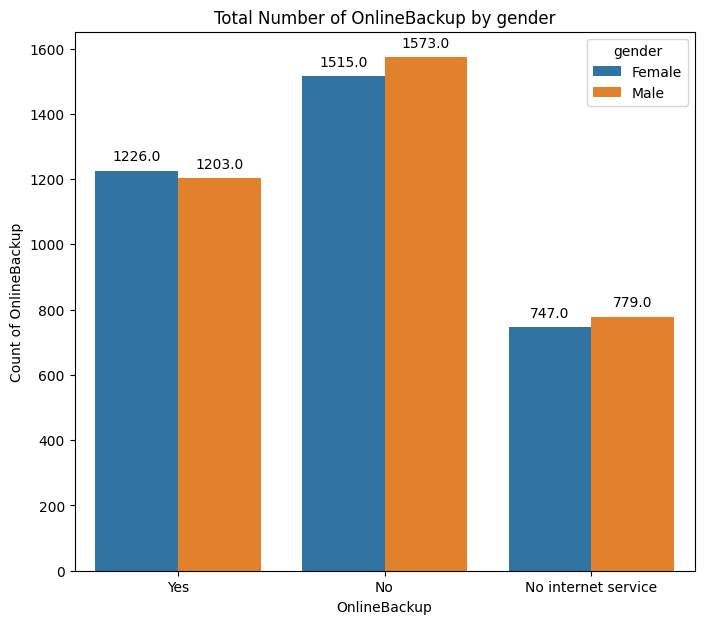

In [56]:
# Wrong
# # No category is duplicated with wrong numenclature. It is having 3 categories instead of 2
# Data visualizaito for OnlineBackup

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineBackup', data=df, hue = 'gender')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineBackup')
plt.ylabel('Count of OnlineBackup')
plt.title('Total Number of OnlineBackup by gender')

# Display the count of each partner
onBack_count = df['OnlineBackup'].value_counts()
print("Count of OnlineBackup Categories:")
print(onBack_count)

In [57]:
# No category is duplicated with wrong numenclature. It is having 3 categories instead of 2
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

# Observation: No category is duplicated with wrong numenclature.
-The duplicates shall be removed

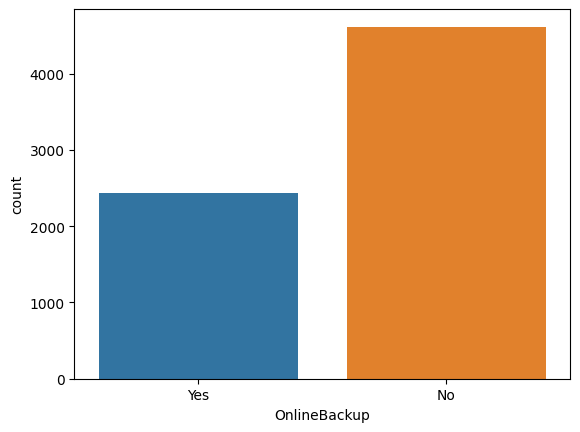

In [58]:
# Change 'No phone service' to No

df.loc[df['OnlineBackup']== 'No internet service', 'OnlineBackup']= 'No'
sns.countplot(x= 'OnlineBackup', data=df);

Count of OnlineBackup Categories:
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


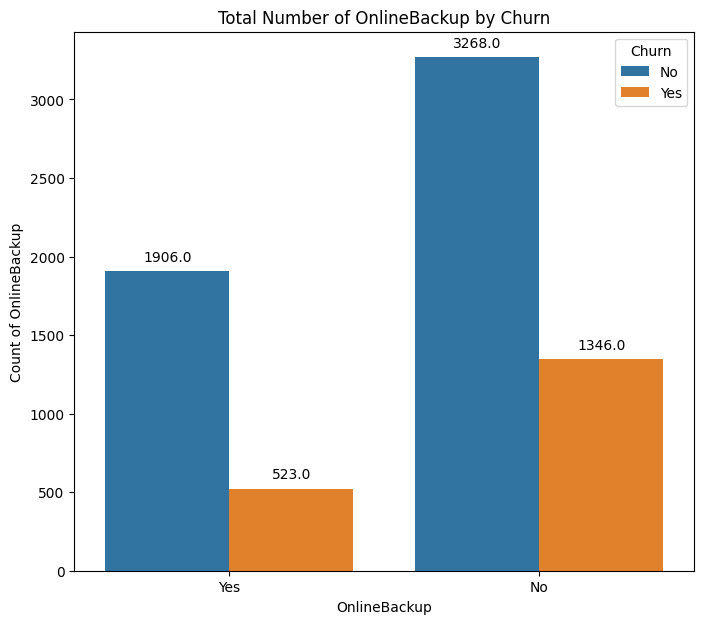

In [59]:
# Data visualizaito for OnlineBackup

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineBackup', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineBackup')
plt.ylabel('Count of OnlineBackup')
plt.title('Total Number of OnlineBackup by Churn')

# Display the count of each partner
onSec_count = df['OnlineBackup'].value_counts()
print("Count of OnlineBackup Categories:")
print(onSec_count)

Count of OnlineBackup Categories:
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


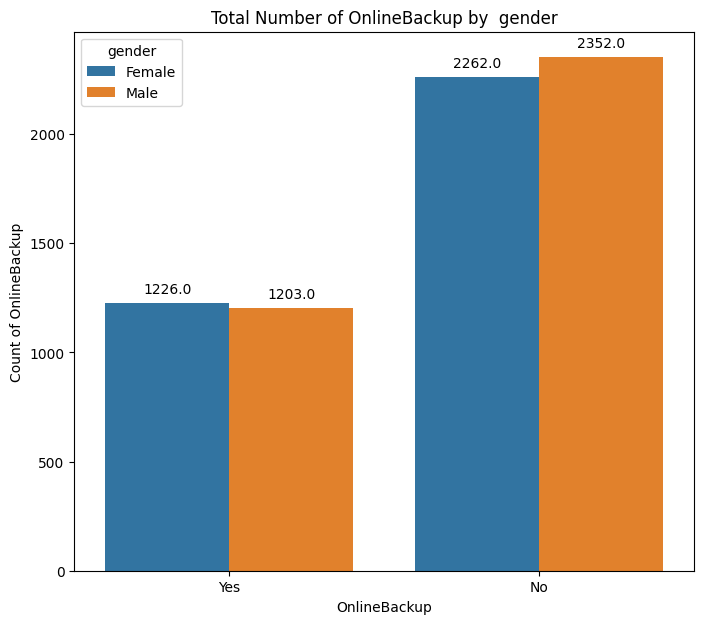

In [60]:
# Data visualizaito for OnlineBackup gender

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'OnlineBackup', data=df, hue =  'gender')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('OnlineBackup')
plt.ylabel('Count of OnlineBackup')
plt.title('Total Number of OnlineBackup by  gender')

# Display the count of each partner
onBack_count = df['OnlineBackup'].value_counts()
print("Count of OnlineBackup Categories:")
print(onBack_count)

Count of DeviceProtection Categories:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


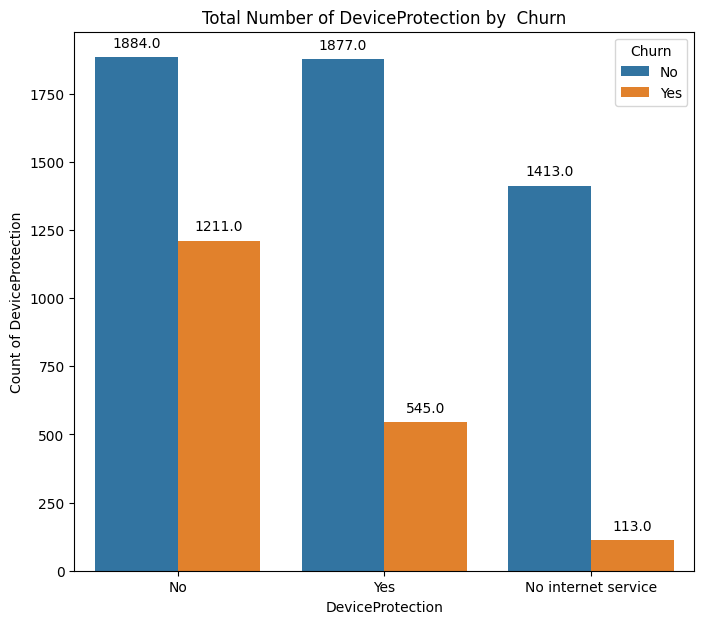

In [61]:
# Wrong
# # No category is duplicated with wrong numenclature. It is having 3 categories instead of 2

# Data visualizaito for DeviceProtection by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'DeviceProtection', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('DeviceProtection')
plt.ylabel('Count of DeviceProtection')
plt.title('Total Number of DeviceProtection by  Churn')

# Display the count of each partner
DevP_count = df['DeviceProtection'].value_counts()
print("Count of DeviceProtection Categories:")
print(DevP_count)

In [62]:
# No category is duplicated with wrong numenclature. It is having 3 categories instead of 2
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

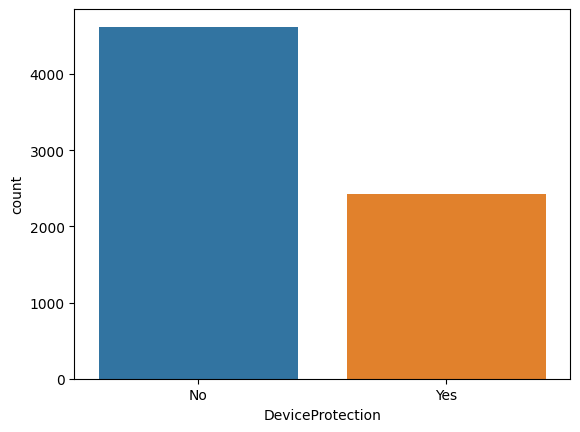

In [63]:
# Change 'No phone service' to No

df.loc[df['DeviceProtection']== 'No internet service', 'DeviceProtection']= 'No'
sns.countplot(x= 'DeviceProtection', data=df);

Count of DeviceProtection Categories:
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


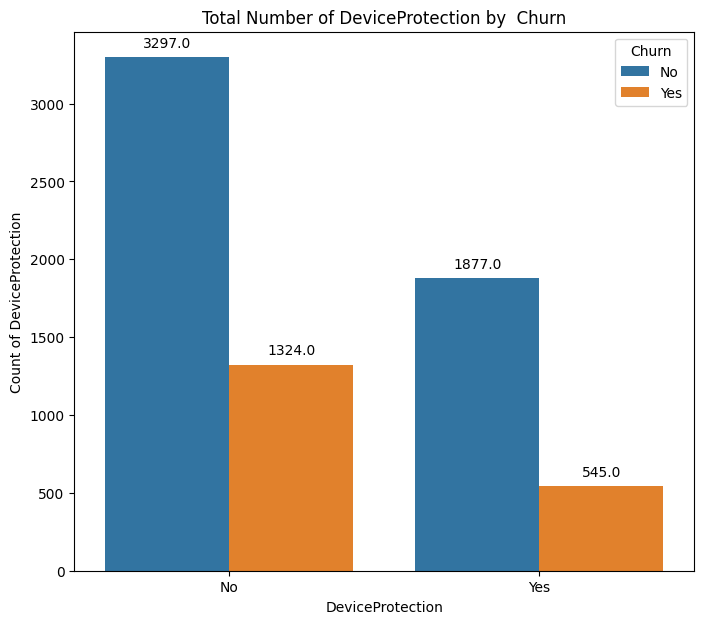

In [64]:
# Data visualizaito for DeviceProtection by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'DeviceProtection', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('DeviceProtection')
plt.ylabel('Count of DeviceProtection')
plt.title('Total Number of DeviceProtection by  Churn')

# Display the count of each partner
DevP_count = df['DeviceProtection'].value_counts()
print("Count of DeviceProtection Categories:")
print(DevP_count)

Count of DeviceProtection Categories:
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


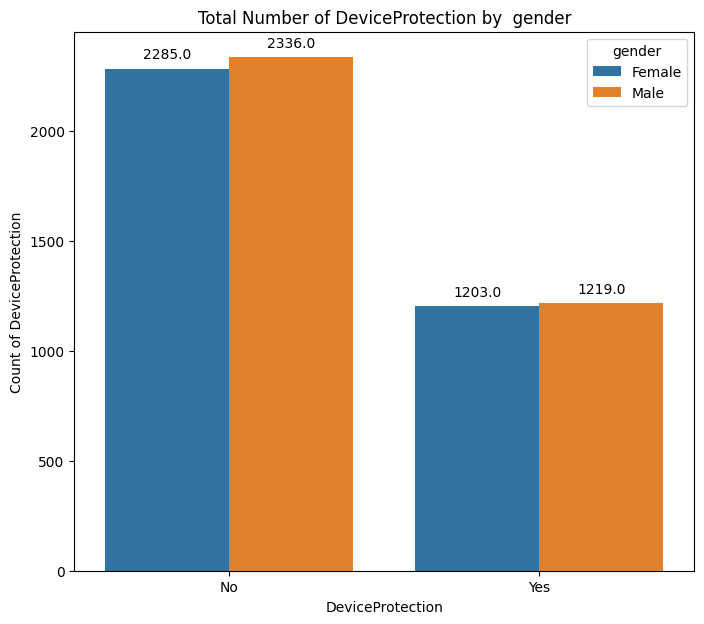

In [65]:
# Data visualizaito for DeviceProtection by gender

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'DeviceProtection', data=df, hue =  'gender')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('DeviceProtection')
plt.ylabel('Count of DeviceProtection')
plt.title('Total Number of DeviceProtection by  gender')

# Display the count of each partner
DevP_count = df['DeviceProtection'].value_counts()
print("Count of DeviceProtection Categories:")
print(DevP_count)

Count of TechSupport Categories:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


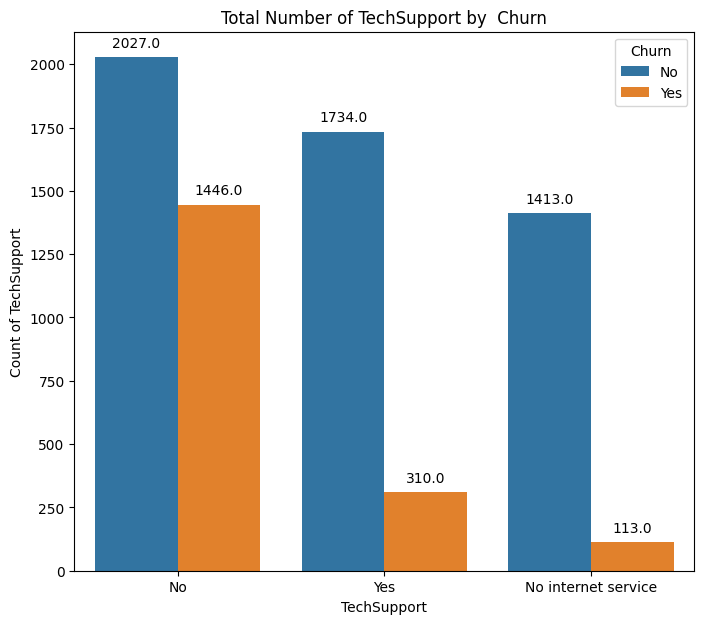

In [66]:
# Wrong
# # No category is duplicated with wrong numenclature. It is having 3 categories instead of 2

# Data visualizaito for TechSupport by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'TechSupport', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('TechSupport')
plt.ylabel('Count of TechSupport')
plt.title('Total Number of TechSupport by  Churn')

# Display the count of each partner
TechS_count = df['TechSupport'].value_counts()
print("Count of TechSupport Categories:")
print(TechS_count)

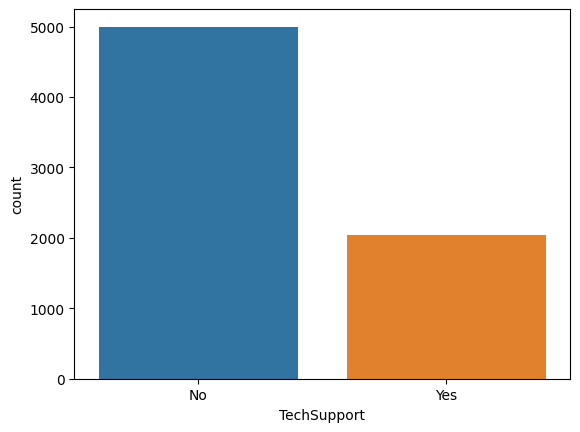

In [67]:
# Change 'No phone service' to No

df.loc[df['TechSupport']== 'No internet service', 'TechSupport']= 'No'
sns.countplot(x= 'TechSupport', data=df);

Count of TechSupport Categories:
No     4999
Yes    2044
Name: TechSupport, dtype: int64


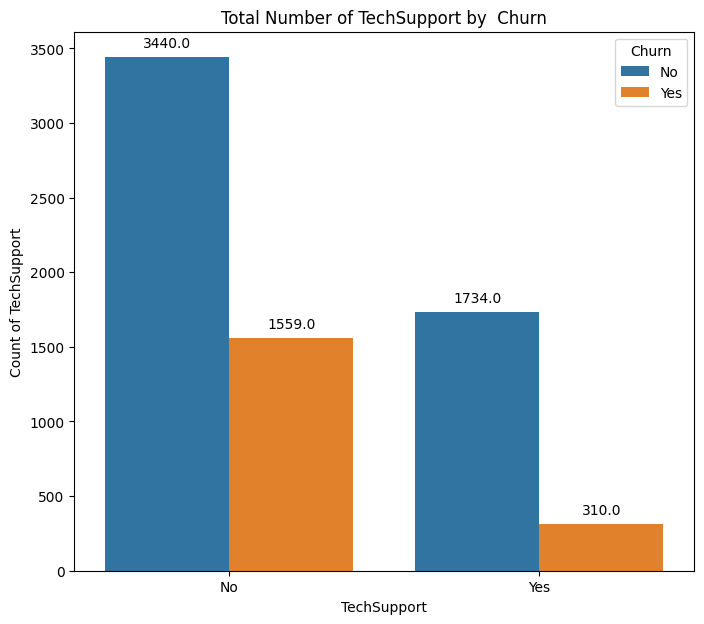

In [68]:
# Data visualizaito for TechSupport by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'TechSupport', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('TechSupport')
plt.ylabel('Count of TechSupport')
plt.title('Total Number of TechSupport by  Churn')

# Display the count of each partner
TechS_count = df['TechSupport'].value_counts()
print("Count of TechSupport Categories:")
print(TechS_count)

Count of StreamingTV Categories:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


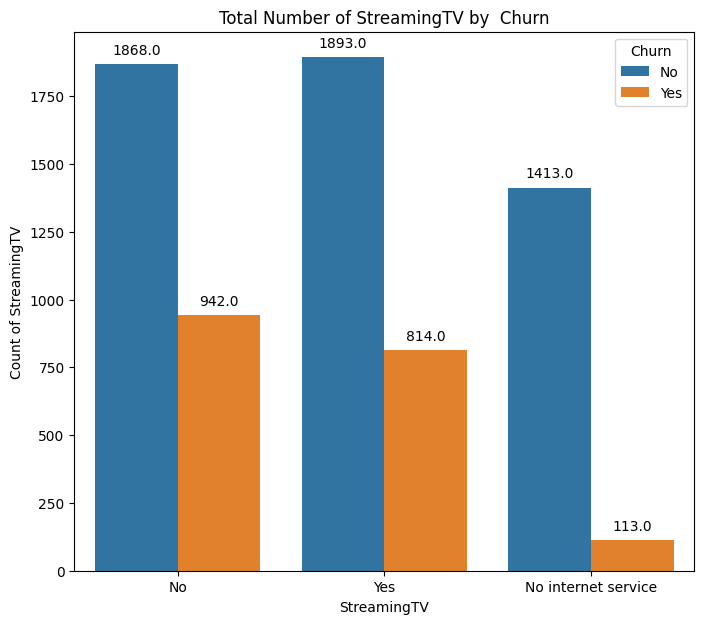

In [69]:
# Wrong
# # No category is duplicated with wrong numenclature. It is having 3 categories instead of 2


# Data visualizaito for StreamingTV by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'StreamingTV', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('StreamingTV')
plt.ylabel('Count of StreamingTV')
plt.title('Total Number of StreamingTV by  Churn')

# Display the count of each partner
Tv_count = df['StreamingTV'].value_counts()
print("Count of StreamingTV Categories:")
print(Tv_count)

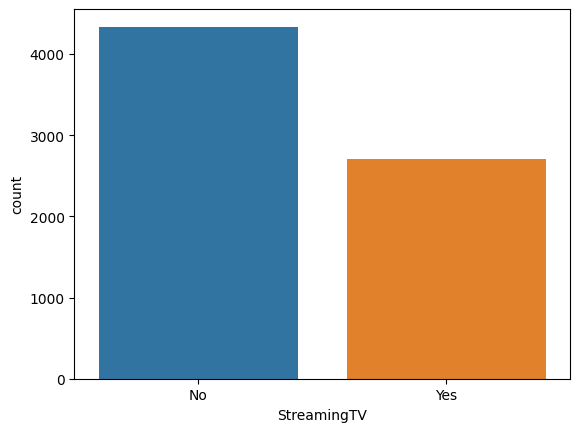

In [70]:
# Change 'No phone service' to No

df.loc[df['StreamingTV']== 'No internet service', 'StreamingTV']= 'No'
sns.countplot(x= 'StreamingTV', data=df);

Count of StreamingTV Categories:
No     4336
Yes    2707
Name: StreamingTV, dtype: int64


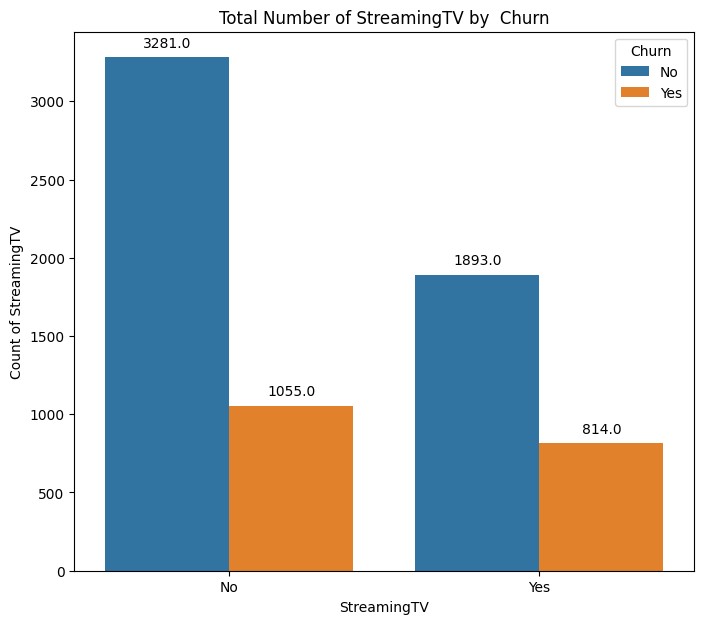

In [71]:

# Data visualizaito for StreamingTV by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'StreamingTV', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('StreamingTV')
plt.ylabel('Count of StreamingTV')
plt.title('Total Number of StreamingTV by  Churn')

# Display the count of each partner
Tv_count = df['StreamingTV'].value_counts()
print("Count of StreamingTV Categories:")
print(Tv_count)

Count of StreamingMovies Categories:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


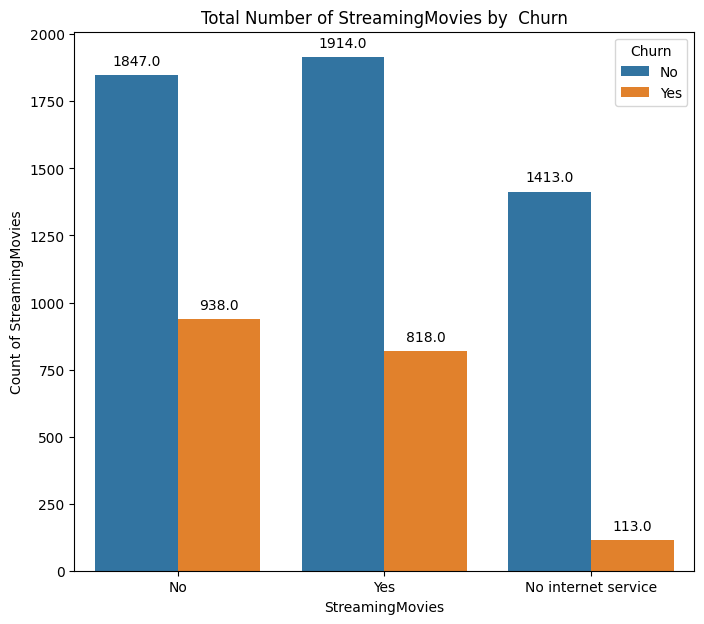

In [72]:
# Data visualizaito for StreamingMovies by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'StreamingMovies', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('StreamingMovies')
plt.ylabel('Count of StreamingMovies')
plt.title('Total Number of StreamingMovies by  Churn')

# Display the count of each partner
movies_count = df['StreamingMovies'].value_counts()
print("Count of StreamingMovies Categories:")
print(movies_count)

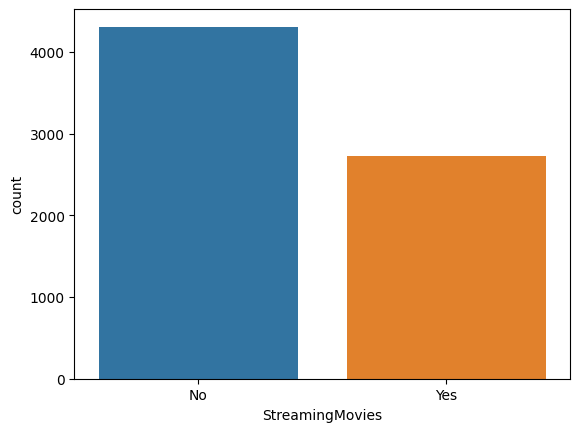

In [73]:
# Change 'No phone service' to No

df.loc[df['StreamingMovies']== 'No internet service', 'StreamingMovies']= 'No'
sns.countplot(x= 'StreamingMovies', data=df);

Count of StreamingMovies Categories:
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


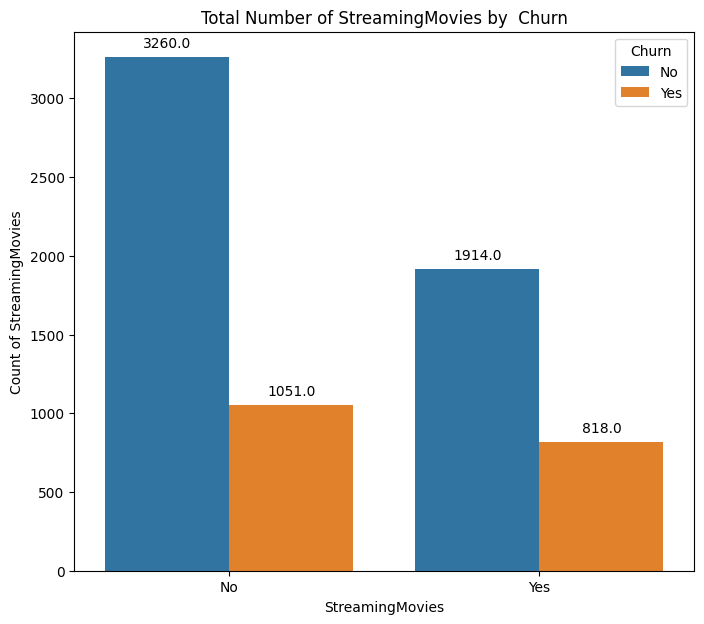

In [74]:
# Data visualizaito for StreamingMovies by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'StreamingMovies', data=df, hue =  'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('StreamingMovies')
plt.ylabel('Count of StreamingMovies')
plt.title('Total Number of StreamingMovies by  Churn')

# Display the count of each partner
movies_count = df['StreamingMovies'].value_counts()
print("Count of StreamingMovies Categories:")
print(movies_count)

Count of Contract Categories:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


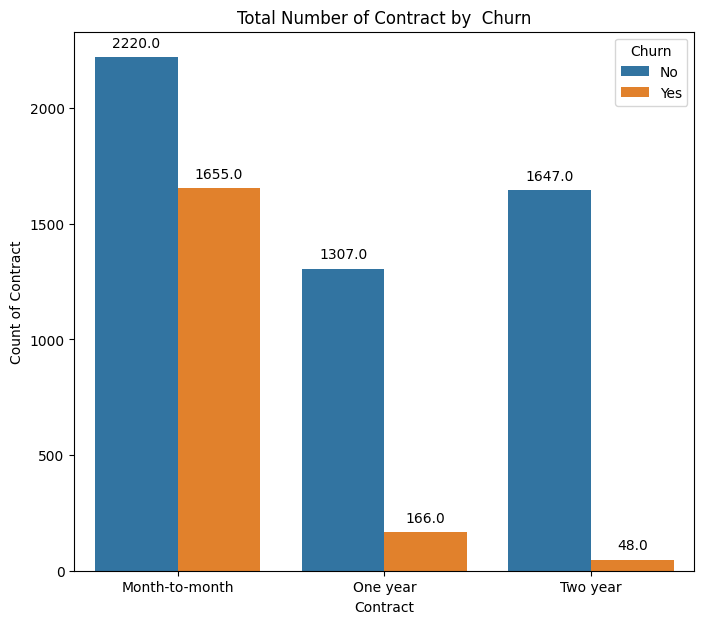

In [75]:
# Data visualizaito for Contract by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'Contract', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Total Number of Contract by  Churn')

# Display the count of each partner
contract_count = df['Contract'].value_counts()
print("Count of Contract Categories:")
print(contract_count)

Count of Contract Categories:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


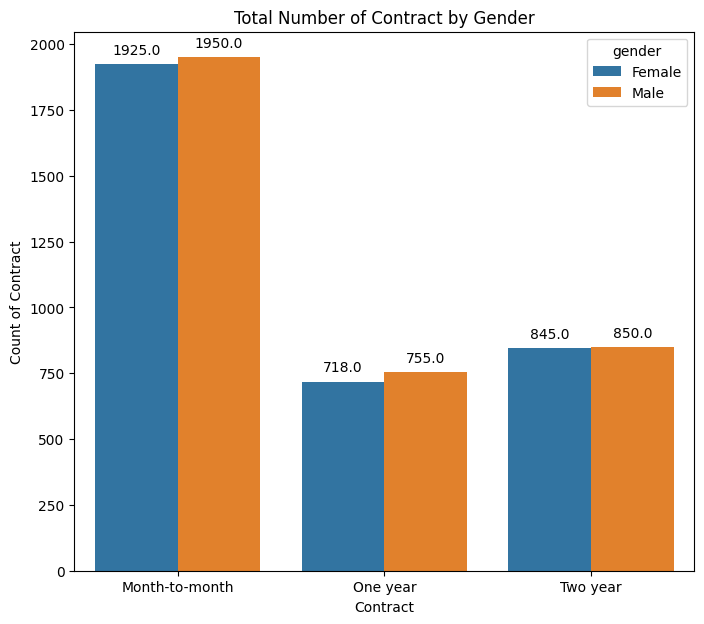

In [76]:
# Data visualizaito for Contract by gender

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'Contract', data=df, hue =  'gender')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Total Number of Contract by Gender')

# Display the count of each partner
contract_count = df['Contract'].value_counts()
print("Count of Contract Categories:")
print(contract_count)

Count of PaperlessBilling Categories:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


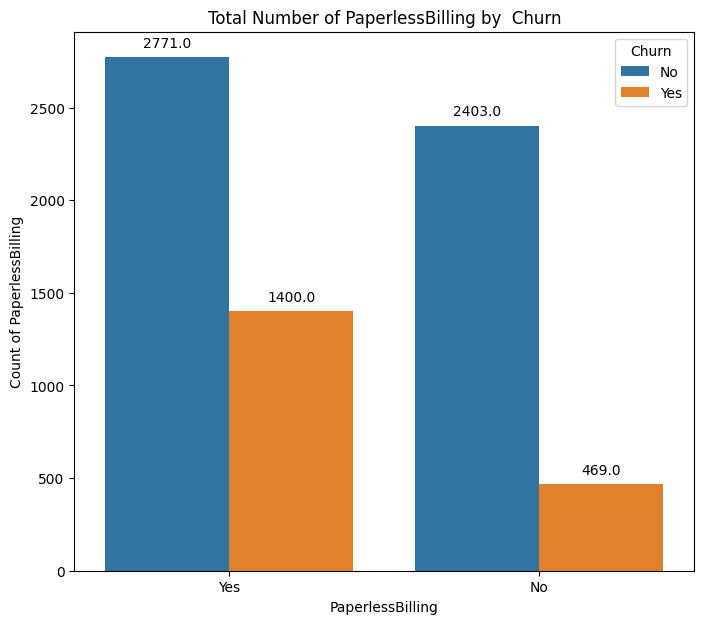

In [77]:
# Data visualizaito forPaperlessBilling by Churn

#Plotting
plt.figure(figsize = (8,7))
ax = sns.countplot(x=  'PaperlessBilling', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('PaperlessBilling')
plt.ylabel('Count of PaperlessBilling')
plt.title('Total Number of PaperlessBilling by  Churn')

# Display the count of each partner
pLess_count = df['PaperlessBilling'].value_counts()
print("Count of PaperlessBilling Categories:")
print(pLess_count)

Count of Payment Method Categories:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


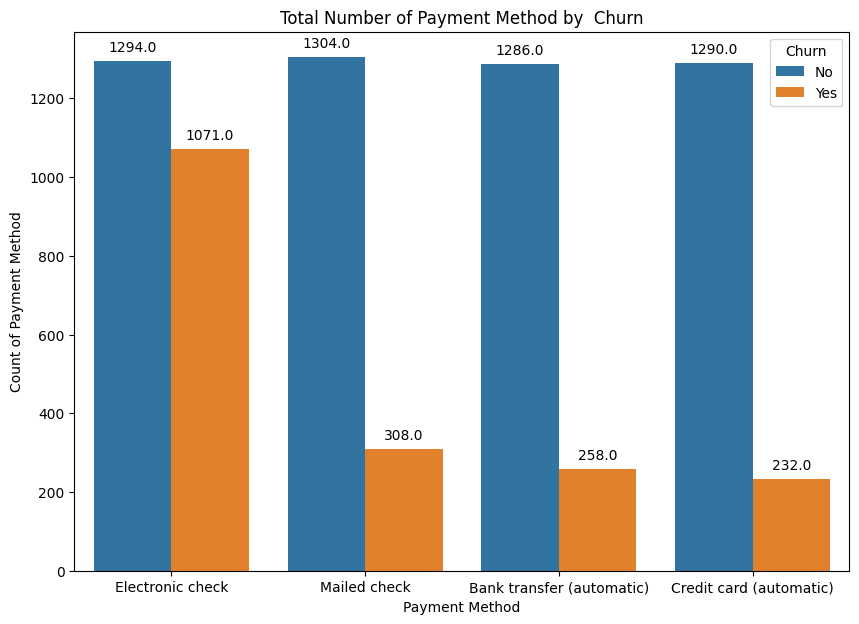

In [78]:
# Data visualizaito for Payment Method by Churn

#Plotting
plt.figure(figsize = (10,7))
ax = sns.countplot(x=  'PaymentMethod', data=df, hue = 'Churn')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Payment Method')
plt.ylabel('Count of Payment Method')
plt.title('Total Number of Payment Method by  Churn')

# Display the count of each partner
pMeth_count = df['PaymentMethod'].value_counts()
print("Count of Payment Method Categories:")
print(pMeth_count)

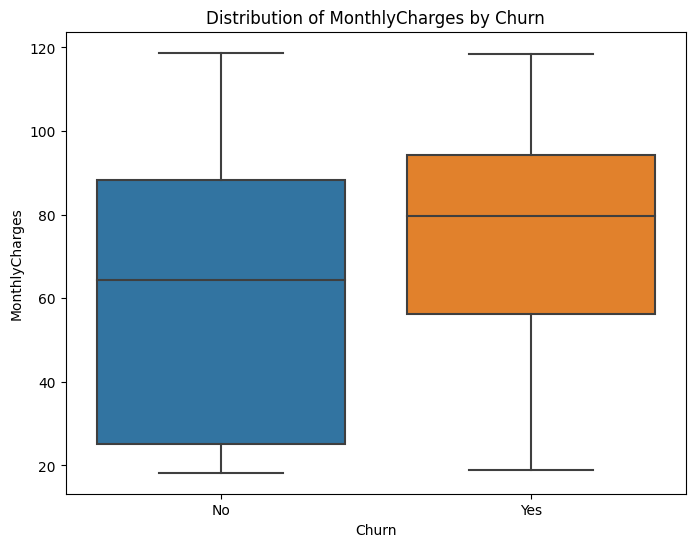

In [79]:
# Investigating the customers MonthlyCharges by the target features (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Distribution of MonthlyCharges by Churn')
plt.show()

# Multivariate Data Analysis

In [80]:
# Correlation
a = df.corr();
a

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


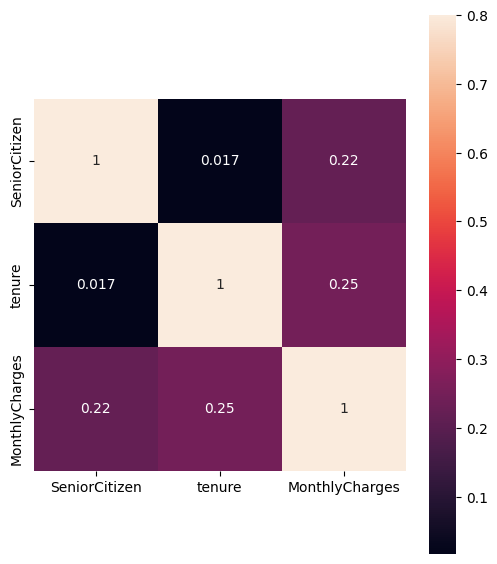

In [81]:
# Correlation
a = df.corr()
f, ax = plt.subplots(figsize = (6, 7))
sns.heatmap(a, vmax =.8, square =True, annot = True);

# Key Obeservations
- It was observed that SeniorCitizen, tenure and MonthlyCharges have a verry weak correlate with each other.
- Each of the correlation value is < 0.3. hence, the variable did not correlate with each other
- No outliers
- MultipleLines was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- OnlineSecurity was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- OnlineBackup was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- DeviceProtection was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- TechSupport was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- StreamingTV was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’
- StreamingMovies was erroneously given 3 categories with ‘No phone service’ as one category. This was re-assign to category ‘No’


# Feature Engineering/Data Pre-processing

In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,citizens_cat
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Junior Citizen
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Junior Citizen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Junior Citizen
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Junior Citizen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Junior Citizen


In [83]:
print(df.shape)


(7043, 21)


In [84]:
print(df.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
citizens_cat         object
dtype: object


In [85]:
# segment dataset
y = df.pop('Churn')

In [86]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [87]:
#variable encoding using one hot encoding

df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,citizens_cat_Senior Citizen
0,0,1,29.85,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning
- Splitting data into training and evaluation datasets
- Implimenting Manchine Learning/model Building and Training
- creating a predictions file

In [88]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 123)

# Display the shapes of the resulting sets
print("X_train, training feature data:", x_train.shape)
print("X_test, evaluation feature data:", x_test.shape)
print("y_train, training target data:", y_train.shape)
print("y_test, evaluation target data:", y_test.shape)


X_train, training feature data: (4930, 6553)
X_test, evaluation feature data: (2113, 6553)
y_train, training target data: (4930,)
y_test, evaluation target data: (2113,)


In [89]:
# importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [90]:
# intantiating models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
gb_clf= GradientBoostingClassifier() # Gradient boosting is an ensemble learning technique that combines multiple weak models (typically decision trees) to create a stronger predictive model.
svc = SVC()

In [91]:
# taining the model
log_reg.fit(x_train,y_train)
dec_tree.fit(x_train,y_train)
gb_clf.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC()

In [92]:
# creating a prediction file for all the modes
log_pred = log_reg.predict(x_test)
dec_pred = dec_tree.predict(x_test)
gb_pred = gb_clf.predict(x_test)
svc_pred = svc.predict(x_test)

# Display the predicted labels of each model
print(" Logistic Regression predictions:", log_pred)
print("Decision Tree predictions:", dec_pred)
print("Gradient Boosting predictions:", gb_pred)
print("Support Vector Machines (SVM) predictions:", svc_pred)

 Logistic Regression predictions: ['No' 'No' 'No' ... 'No' 'Yes' 'No']
Decision Tree predictions: ['No' 'No' 'No' ... 'No' 'No' 'No']
Gradient Boosting predictions: ['No' 'No' 'No' ... 'No' 'Yes' 'No']
Support Vector Machines (SVM) predictions: ['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [93]:
# importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
# classification_report
print('classification report for the  logistic regression model \n', classification_report(y_test, log_pred))
print("classification report for the decision tree model \n",classification_report(y_test,dec_pred))
print("classification report for the Gradient Boosting model \n",classification_report(y_test,gb_pred))
print("classification report for the Support Vector Machines (SVM) model \n",classification_report(y_test,svc_pred))

classification report for the  logistic regression model 
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1523
         Yes       0.65      0.52      0.58       590

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

classification report for the decision tree model 
               precision    recall  f1-score   support

          No       0.81      0.87      0.84      1523
         Yes       0.59      0.46      0.52       590

    accuracy                           0.76      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113

classification report for the Gradient Boosting model 
               precision    recall  f1-score   support

          No       0.82      0.92      0.86      1523
         Yes       0.68      0.47      0.55       590

    accuracy   

# Breakdown of the confusion matrix:

- True Positive (TP):
Instances where the model correctly predicted the positive class.

- True Negative (TN):
Instances where the model correctly predicted the negative class.

- False Positive (FP):
Instances where the model incorrectly predicted the positive class (false alarm).

- False Negative (FN):
Instances where the model incorrectly predicted the negative class (miss).

- .........................................................................................................................

- Actual Negative (TN):

These are instances that are truly negative, and the model correctly predicts them as negative. It represents the count of instances where the model got it right by predicting a negative outcome when the actual outcome is negative.
- Actual Positive (TP):

These are instances that are truly positive, and the model correctly predicts them as positive. It represents the count of instances where the model got it right by predicting a positive outcome when the actual outcome is positive.
In summary:

- "Actual Negative" corresponds to the instances with a true negative outcome.
- "Actual Positive" corresponds to the instances with a true positive outcome.


# A breakdown of each cell in confusion matrix:

- Top Left (TN):

The count of instances where the model correctly predicted the negative class.
- Top Right (FP):

The count of instances where the model incorrectly predicted the positive class when the true class was negative.
- Bottom Left (FN):

The count of instances where the model incorrectly predicted the negative class when the true class was positive.
- Bottom Right (TP):

The count of instances where the model correctly predicted the positive class.

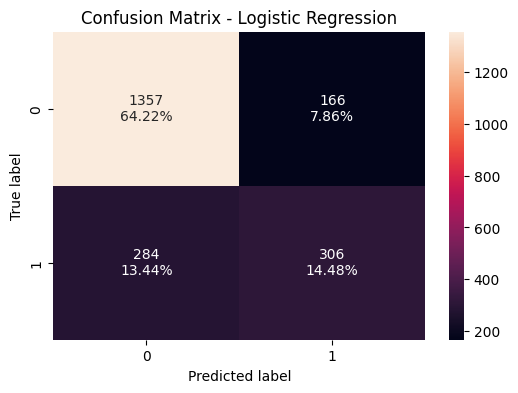

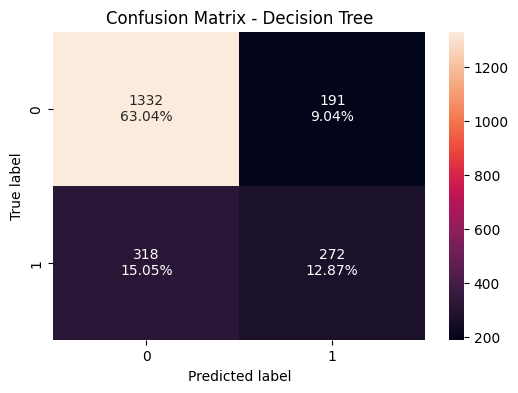

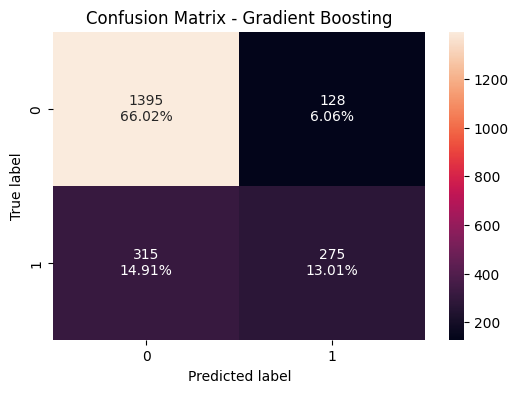

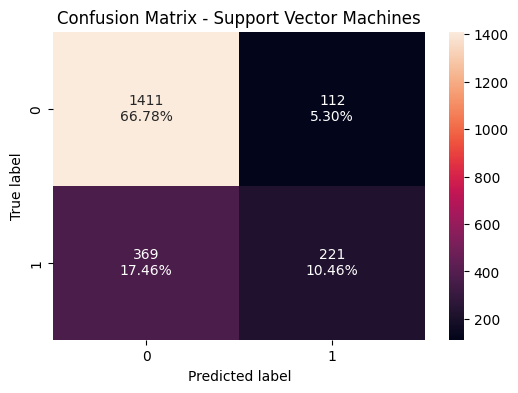

In [95]:
def confusion_matrix_sklearn(model, predictors, target, title="Confusion Matrix"):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    title: title for the confusion matrix plot
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# Using the function with model names as titles
confusion_matrix_sklearn(log_reg, x_test, y_test, title="Confusion Matrix - Logistic Regression")
confusion_matrix_sklearn(dec_tree, x_test, y_test, title="Confusion Matrix - Decision Tree")
confusion_matrix_sklearn(gb_clf, x_test, y_test, title="Confusion Matrix - Gradient Boosting")
confusion_matrix_sklearn(svc, x_test, y_test, title="Confusion Matrix - Support Vector Machines")

## Insights and Recommendations Stemming from Confusion Matrx
Analyzing the confusion matrix results and considering the context of churn prediction in a telecommunications company, here are insights and recommendations:
Insights:
## 1.	Logistic Regression:
- •	False Negatives (FN): 13.44%
- •	False Positives (FP): 7.86%
- •	FN indicates customers predicted as not churning but who actually do. Reducing FN is crucial to prevent actual churners from being overlooked.
## 2.	Gradient Boosting:
- •	False Negatives (FN): 15.14%
- •	False Positives (FP): 6.20%
- •	Similar to logistic regression, FN is a concern. Balancing FN and FP is crucial for optimizing model performance.
## 3.	Decision Tree:
- •	False Negatives (FN): 14.77%
- •	False Positives (FP): 8.71%
- •	Comparable to other models, FN is a key consideration.
## 4.	Support Vector Machine:
- •	False Negatives (FN): 17.46%
- •	False Positives (FP): 5.30%
- •	Highest FN among the models. Balancing FN and FP is essential.
## Recommendations:
## 1.	Key Metrics:
- •	Recall (Sensitivity): Given the nature of churn prediction, minimizing False Negatives is critical. Recall measures the ability to correctly identify actual churners, making it a key metric. A higher recall indicates fewer actual churners are missed.
## 2.	Business Risk and Implications:
- •	False Negatives (Missed Churners): This poses a risk as the company may lose customers who were not identified as potential churners. These customers might leave without the company taking proactive retention measures.
- •	False Positives (False Alarms): While not desirable, false alarms can lead to unnecessary retention efforts, which may have a cost. However, it's generally less critical than missing actual churners.
## 3.	Business Operation Implications:
- •	Proactive Retention Strategies: Focus on implementing targeted retention strategies for customers identified as potential churners.
- •	Customer Engagement: Enhance customer engagement initiatives to address the factors contributing to churn.
## 4.	Professional Recommendations:
- •	Model Refinement: Explore ways to further improve the models, possibly by tuning hyperparameters, trying different algorithms, or addressing class imbalance.
- •	Continuous Monitoring: Implement a system for continuous model monitoring and updates to adapt to changing patterns in customer behavior.
- •	Customer Feedback: Gather feedback from customers leaving the service to understand their reasons, contributing to model improvement.
## 5.	Stakeholder Communication:
- •	Clearly communicate the importance of minimizing False Negatives and the associated risks.
- •	Emphasize the need for a balanced approach, considering both the cost of false alarms and the cost of missing actual churners.
By prioritizing recall and balancing the trade-off between false negatives and false positives, the company can implement targeted strategies to retain customers at risk of churning, leading to improved customer satisfaction and long-term business sustainability.


# Model Performance Evaluation:
## Logistic Regression:
- •	Accuracy: 79%
- •	Precision (Yes): 65%
- •	Recall (Yes): 52%
- •	F1-Score (Yes): 58%
## Decision Tree:
- •	Accuracy: 77%
- •	Precision (Yes): 60%
- •	Recall (Yes): 47%
- •	F1-Score (Yes): 53%
## Gradient Boosting:
- •	Accuracy: 79%
- •	Precision (Yes): 67%
- •	Recall (Yes): 46%
- •	F1-Score (Yes): 54%
## Support Vector Machines (SVM):
- •	Accuracy: 77%
- •	Precision (Yes): 66%
- •	Recall (Yes): 37%
- •	F1-Score (Yes): 48%
## Insights:
## 1.	Logistic Regression:
- •	Good overall accuracy.
- •	Relatively balanced precision and recall for "Yes" class.
## 2.	Decision Tree:
- •	Slightly lower accuracy.
- •	Lower recall for the "Yes" class, indicating it may miss some churners.
## 3.	Gradient Boosting:
- •	Similar accuracy to Logistic Regression.
- •	Higher precision but lower recall for the "Yes" class compared to Logistic Regression.
## 4.	SVM:
- •	Comparable accuracy to Decision Tree.
- •	Lower recall for the "Yes" class, suggesting a higher risk of missing churners.
## Recommendations:
## 1.	Best Performing Model: Logistic Regression
- •	Balanced accuracy, precision, and recall.
- •	Well-suited for customer churn prediction in this context.
## 2.	Business Implications:
- •	Risk of Missing Churners (False Negatives):
Identify and address potential service or communication issues leading to churn.
- •	Cost of False Alarms (False Positives):
Implement targeted retention strategies, balancing the cost of retention efforts.
## 3.	Communication to Stakeholders:
- •	Emphasize the importance of balancing precision and recall.
- •	Highlight the potential risks associated with each type of error (missing churners vs. false alarms).
## 4.	Continuous Improvement:
- •	Regularly update and retrain the model with new data.
- •	Seek customer feedback to enhance the model's understanding of churn indicators.
## 5.	Retrospective Analysis:
- •	Conduct a retrospective analysis to understand the reasons behind false negatives and positives.
- •	Adjust the model or business strategies based on insights gained.
## 6.	Potential Model Enhancements:
- •	Explore hyperparameter tuning or feature engineering to improve model performance further.
- •	Experiment with ensemble techniques to combine predictions from multiple models.
## 7.	Cost-Benefit Analysis:
- •	Evaluate the cost of retention efforts against potential revenue loss from churn.
- •	Optimize retention strategies to maximize cost-effectiveness.
## 8.	Long-Term Strategy:
- •	Consider implementing a customer loyalty program or incentives to enhance customer satisfaction and reduce churn.
# Final Recommendation:
Based on the presented insights and business considerations, the Logistic Regression model appears to be the best choice for customer churn prediction in the given context. However, continuous monitoring, model refinement, and strategic business decisions are essential for sustained success in reducing customer churn.



In [96]:
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Specify the hyperparameter grid for each model
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create instances of the models
svm_model = SVC()
xgb_model = XGBClassifier()
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Create hyperparameter optimization instances for each model
grid_svm = GridSearchCV(svm_model, param_grid_svm, scoring='accuracy', cv=5)
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='accuracy', cv=5)
grid_logreg = GridSearchCV(logreg_model, param_grid_logreg, scoring='accuracy', cv=5)
grid_dt = GridSearchCV(dt_model, param_grid_dt, scoring='accuracy', cv=5)


In [ ]:
#Productionizing models
import joblib

# Specify the filename/path where the model will be saved
filename = './logReg_model.pkl'

# Use joblib.dump() to save the logistic regression model to the specified file
joblib.dump(log_reg, filename)


['./logReg_model.pkl']